In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [11]:
DATA_PATH = r'c:\Users\Luis\Documents\GitHub\Infrared-Solar-Modules-Classifier\Data/2020-02-14_InfraredSolarModules'

METADATA_PATH = os.path.join(DATA_PATH, 'module_metadata.json')

In [12]:
df = pd.read_json(METADATA_PATH, orient='index').sort_index()
df['image_filepath'] = df.image_filepath.apply(lambda x: os.path.join(DATA_PATH, x))
df

,image_filepath,anomaly_class
0,c:\Users\Luis\Documents\GitHub\Infrared-Solar-...,Offline-Module
1,c:\Users\Luis\Documents\GitHub\Infrared-Solar-...,Offline-Module
2,c:\Users\Luis\Documents\GitHub\Infrared-Solar-...,Offline-Module
3,c:\Users\Luis\Documents\GitHub\Infrared-Solar-...,Offline-Module
4,c:\Users\Luis\Documents\GitHub\Infrared-Solar-...,Offline-Module
...,...,...
19995,c:\Users\Luis\Documents\GitHub\Infrared-Solar-...,No-Anomaly
19996,c:\Users\Luis\Documents\GitHub\Infrared-Solar-...,No-Anomaly
19997,c:\Users\Luis\Documents\GitHub\Infrared-Solar-...,No-Anomaly
19998,c:\Users\Luis\Documents\GitHub\Infrared-Solar-...,No-Anomaly


There's a class imbalance in the data.
But only between anomalies.

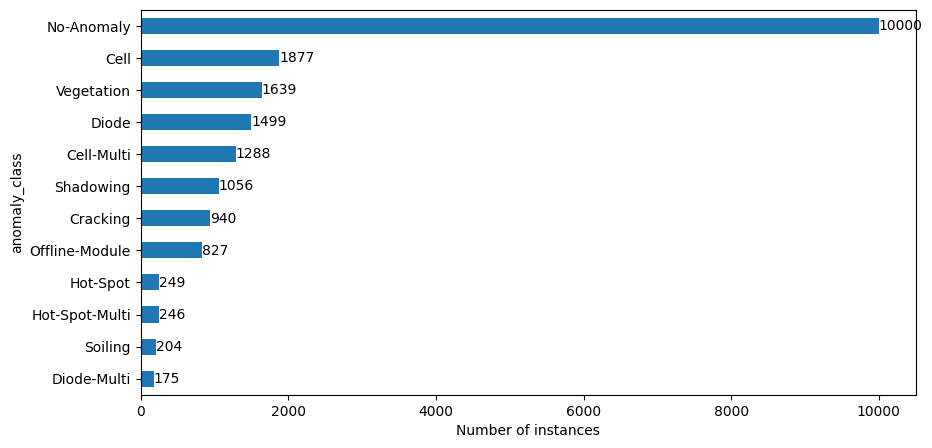

In [13]:
ax = df.anomaly_class.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,5))
ax.bar_label(ax.containers[0])
ax.set_xlabel('Number of instances')
plt.show()

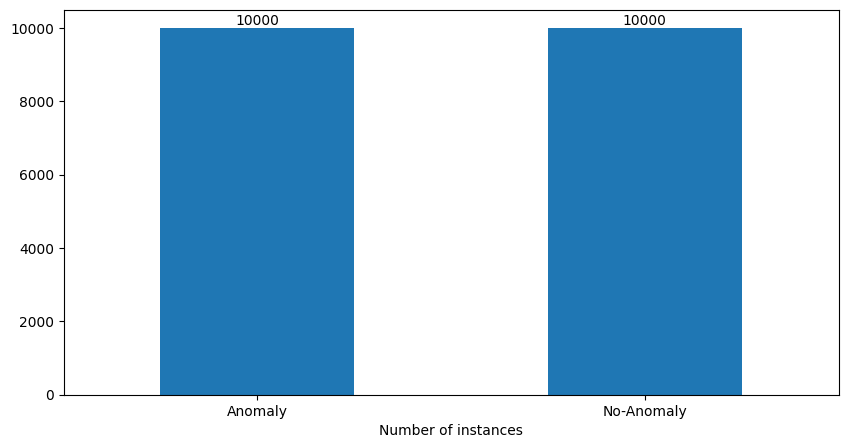

In [14]:
def convert_to_binary(x):
    x = 'Anomaly' if x != 'No-Anomaly' else x
    return x

ax = df.anomaly_class.apply(convert_to_binary).value_counts().plot.bar(figsize=(10,5))
ax.tick_params(labelrotation=0)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Number of instances')
plt.show()

In [20]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np

In [21]:
sample = df.groupby('anomaly_class').sample()
print(sample)
print(sample.iloc[2, 0])

                                          image_filepath   anomaly_class
6191   c:\Users\Luis\Documents\GitHub\Infrared-Solar-...            Cell
4679   c:\Users\Luis\Documents\GitHub\Infrared-Solar-...      Cell-Multi
7266   c:\Users\Luis\Documents\GitHub\Infrared-Solar-...        Cracking
1225   c:\Users\Luis\Documents\GitHub\Infrared-Solar-...           Diode
1001   c:\Users\Luis\Documents\GitHub\Infrared-Solar-...     Diode-Multi
6770   c:\Users\Luis\Documents\GitHub\Infrared-Solar-...        Hot-Spot
7925   c:\Users\Luis\Documents\GitHub\Infrared-Solar-...  Hot-Spot-Multi
10968  c:\Users\Luis\Documents\GitHub\Infrared-Solar-...      No-Anomaly
558    c:\Users\Luis\Documents\GitHub\Infrared-Solar-...  Offline-Module
2778   c:\Users\Luis\Documents\GitHub\Infrared-Solar-...       Shadowing
8246   c:\Users\Luis\Documents\GitHub\Infrared-Solar-...         Soiling
8470   c:\Users\Luis\Documents\GitHub\Infrared-Solar-...      Vegetation
c:\Users\Luis\Documents\GitHub\Infrared-Solar-Modul

In [22]:
image_path= sample.iloc[2, 0]
print(image_path)

c:\Users\Luis\Documents\GitHub\Infrared-Solar-Modules-Classifier\Data/2020-02-14_InfraredSolarModules\images/7266.jpg


In [24]:
# Cargar el modelo preentrenado VGG16
vgg16 = VGG16(weights='imagenet')

# Cargar y preprocesar la imagen de entrada
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Obtener las características de la imagen
features = vgg16.predict(x)

# Imprimir las dimensiones de las características extraídas
print(features)

1/1 [==============================] - 1s 651ms/step
[[2.00319414e-06 1.13961170e-04 2.04370044e-05 1.02769500e-05
  2.24042997e-05 1.30491198e-05 5.90934451e-06 2.22971885e-05
  1.14433888e-05 1.66507471e-05 1.22501579e-05 1.57065206e-05
  2.33308911e-05 2.38905013e-05 5.93157938e-06 2.06412442e-05
  1.09291095e-05 9.56919121e-06 1.98773905e-05 1.42800291e-05
  7.13775762e-06 1.28445463e-05 2.35052230e-05 2.25156582e-05
  2.24291398e-05 8.48712807e-06 1.13537944e-05 7.32612943e-06
  4.51726964e-06 2.68363565e-05 4.11125211e-06 3.02413464e-05
  6.18916147e-06 1.62333417e-05 1.05122263e-05 9.76184401e-06
  5.73104917e-05 1.31239512e-05 9.55063751e-06 2.17857851e-05
  2.75796592e-05 3.80959659e-06 9.55387168e-06 8.81155120e-06
  1.31707320e-05 4.94290980e-05 6.07380389e-05 1.75382720e-05
  1.93738160e-05 1.43747320e-05 4.85510536e-05 2.99826661e-05
  7.45757643e-06 1.41165156e-05 2.07632565e-05 2.49253662e-05
  1.51110798e-05 2.45677461e-06 1.71025986e-05 3.98998527e-05
  4.83733966e-05 